In [1]:
import matplotlib.pyplot as plt
%pylab inline
import PIL
import numpy as np
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
pil_image = PIL.Image.open('F:/gitdata/image_sample/0/1.jpg').convert('1') 
basewidth = 28
proportion = basewidth/pil_image.size[0]
#hight = int(pil_image.size[1]*proportion)
img = pil_image.resize((basewidth,basewidth))
img

In [3]:
cnt=0
for i in range(0,10):
    print(i, len(os.listdir('F:/gitdata/image_sample/{}/'.format(i))[:]),"張")
    cnt += len(os.listdir('F:/gitdata/image_sample/{}/'.format(i))[:])
print('共',cnt,"張")

0 1381 張
1 1575 張
2 1399 張
3 1428 張
4 1364 張
5 1263 張
6 1375 張
7 1459 張
8 1364 張
9 1392 張
共 14000 張


In [4]:
digits = []
labels = []
for i in range(0,10):
    for img in os.listdir('F:/gitdata/image_sample/{}/'.format(i))[:1200]:
        pil_image = PIL.Image.open('F:/gitdata/image_sample/{}/{}'.format(i, img)).convert('1') 
#        basewidth = 30
#        proportion = basewidth/pil_image.size[0]
#        hight = int(pil_image.size[1]*proportion)
        img = pil_image.resize((basewidth,basewidth))
        
        digits.append([pixel for pixel in iter(img.getdata())])
        labels.append(i)

In [5]:
import numpy
digit_ary  = numpy.array(digits)
digit_ary.shape
print("共",digit_ary.shape[0],"張")
print("畫素=",digit_ary.shape[1])

共 12000 張
畫素= 784


In [6]:
from sklearn.model_selection import train_test_split
x = (array(digit_ary)/255)
y = (array(labels))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [7]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [8]:
model = Sequential()
pixel = digit_ary.shape[1]

model.add(Dense(units=400,input_dim = pixel,kernel_initializer='normal',activation='relu'))
#model.add(Dense(units=600,input_dim = pixel,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=650,input_dim = pixel,kernel_initializer='normal',activation='relu'))
#model.add(Dense(units=20,input_dim = pixel,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=120,input_dim = pixel,kernel_initializer='normal',activation='relu'))
#model.add(Dense(units=50,input_dim = pixel,kernel_initializer='normal',activation='relu'))
#model.add(Dense(units=10,input_dim = pixel,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_2 (Dense)              (None, 650)               260650    
_________________________________________________________________
dense_3 (Dense)              (None, 120)               78120     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1210      
Total params: 653,980
Trainable params: 653,980
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils

In [11]:
Train_hot = np_utils.to_categorical(y_train)
Test_hot = np_utils.to_categorical(y_test)

In [12]:
train_history = model.fit(x=x_train,y=Train_hot,validation_split=0.25,epochs=20,batch_size=100,verbose=2)

Train on 6300 samples, validate on 2100 samples
Epoch 1/20
 - 3s - loss: 0.8682 - acc: 0.7295 - val_loss: 0.5169 - val_acc: 0.8310
Epoch 2/20
 - 2s - loss: 0.3443 - acc: 0.8884 - val_loss: 0.4024 - val_acc: 0.8695
Epoch 3/20
 - 2s - loss: 0.2649 - acc: 0.9183 - val_loss: 0.3852 - val_acc: 0.8824
Epoch 4/20
 - 2s - loss: 0.1898 - acc: 0.9403 - val_loss: 0.3004 - val_acc: 0.9048
Epoch 5/20
 - 2s - loss: 0.1276 - acc: 0.9621 - val_loss: 0.3432 - val_acc: 0.8976
Epoch 6/20
 - 2s - loss: 0.1029 - acc: 0.9675 - val_loss: 0.3091 - val_acc: 0.9100
Epoch 7/20
 - 2s - loss: 0.0685 - acc: 0.9790 - val_loss: 0.3108 - val_acc: 0.9081
Epoch 8/20
 - 2s - loss: 0.0489 - acc: 0.9848 - val_loss: 0.3721 - val_acc: 0.9057
Epoch 9/20
 - 2s - loss: 0.0429 - acc: 0.9865 - val_loss: 0.3188 - val_acc: 0.9152
Epoch 10/20
 - 2s - loss: 0.0284 - acc: 0.9919 - val_loss: 0.3237 - val_acc: 0.9248
Epoch 11/20
 - 2s - loss: 0.0122 - acc: 0.9975 - val_loss: 0.3474 - val_acc: 0.9210
Epoch 12/20
 - 2s - loss: 0.0081 - ac

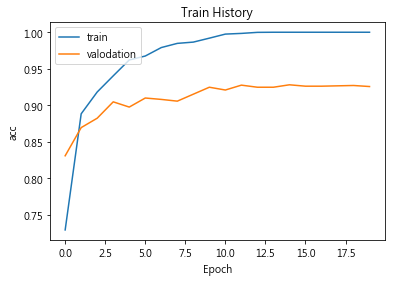

In [13]:
def show_train_history(train_history,train,valodation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[valodation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','valodation'],loc='upper left')
    plt.show()
show_train_history(train_history,'acc','val_acc')

In [14]:
prediction = model.predict_classes(x_test)

In [15]:
import pandas as pd
pd.crosstab(y_test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,344,0,2,0,1,3,4,1,6,1
1,0,367,1,0,1,1,1,0,1,1
2,0,2,335,2,1,1,3,8,8,0
3,1,1,10,310,0,7,1,1,6,2
4,1,2,2,0,325,0,9,1,1,18
5,1,0,1,10,3,344,1,2,2,2
6,2,2,3,0,1,6,368,0,3,0
7,0,2,2,3,2,0,0,352,0,8
8,2,6,4,8,1,7,2,2,318,5


In [16]:
scores = model.evaluate(x_test,Test_hot)
print()
print('accuracy=',scores[1])

3600/3600 [==============================] - 1s 158us/step

accuracy= 0.9347222222222222


In [17]:
from keras.datasets import mnist

In [18]:
(mnist_x_train_img,mnist_y_train_label),(mnist_x_test_img,mnist_y_test_label) = mnist.load_data()

In [19]:
mnist_x_test_img[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [20]:
array(mnist_x_test_img).shape

(10000, 28, 28)

In [21]:
def plot_img(img):
    fig = plt.gcf()
    fig.set_size_inches(3,3)
    plt.imshow(img,cmap='binary')
    plt.show()

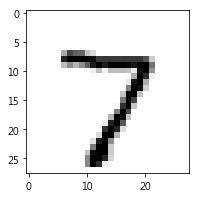

In [22]:
plot_img(mnist_x_test_img[0])

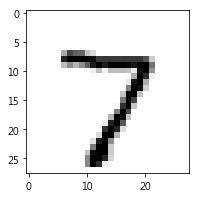

In [23]:
mnist_x_test_img = mnist_x_test_img/255
#mnist_x_test_img = 1-mnist_x_test_img/255   #黑轉白
plot_img(mnist_x_test_img[0])

In [24]:
mnist_x_Test = mnist_x_test_img.reshape(10000,784).astype('float32')

In [25]:
#mnist_x_Test = mnist_x_Test/255

In [26]:
mnist_x_Test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [27]:
mnist_prediction = model.predict_classes(mnist_x_Test)

In [28]:
mnist_df = pd.DataFrame({'test_label':mnist_y_test_label,'prdict':mnist_prediction})

In [29]:
pd.crosstab(mnist_y_test_label,mnist_prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,944,0,4,26,0,2,0,1,3,0
1,0,859,3,34,0,2,1,4,232,0
2,9,1,928,64,1,1,4,7,17,0
3,0,0,4,975,1,12,0,1,16,1
4,23,0,26,10,681,1,25,18,60,138
5,15,0,0,67,3,727,7,5,60,8
6,33,1,10,9,1,45,757,0,102,0
7,2,1,32,77,0,0,1,902,4,9
8,6,0,7,138,2,2,1,9,807,2


In [30]:
mnist_not = np_utils.to_categorical(mnist_y_test_label)
scores = model.evaluate(mnist_x_Test,mnist_not)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 2s 155us/step

accuracy= 0.8411


In [31]:
#mnist_df2 = pd.DataFrame({'id':len(mnist_prediction),'test_label':mnist_y_test_label,'prdict':mnist_prediction,'data':[str(i) for i in mnist_x_Test]})

In [32]:
#[mnist_df2[mnist_df2['prdict']==3]['data']][0]

In [33]:
#mnist_df2['data'][0]